*02 Sep 2024 : 21BAI1133 - Mukundh J*
#  Speech and Natural Language Processing Lab 6
Task :
- Implement text classification using CNN.
- Use any dataset, and it's corresponding classes.
- Train at least three models by changing the
  - number of filters,
  - kernel size,
  - number of CNN layers
  - stride length, and
  - embedding size.
- Print the model summary for each of the models.
- Evaluate and compare the three models in a table using precision, recall, and F1-measure.
- Comment on the scores. Why do you think one system has better scores than the other.
- Code:
  - Segment your code into multiple cells, based on functionality.
  - Comment on your code, based on your understanding.
  - Display useful information through print statements, so your notebook is readable.

In [1]:
!git clone https://github.com/dkv204p/SPAM-HAM-Classification-using-NLP.git

Cloning into 'SPAM-HAM-Classification-using-NLP'...
remote: Enumerating objects: 12, done.
remote: Counting objects: 100% (12/12), done.
remote: Compressing objects: 100% (10/10), done.
remote: Total 12 (delta 1), reused 8 (delta 1), pack-reused 0 (from 0)
Receiving objects: 100% (12/12), 211.95 KiB | 11.15 MiB/s, done.
Resolving deltas: 100% (1/1), done.


In [2]:
import pandas as pd

In [3]:
data = pd.read_csv('/content/SPAM-HAM-Classification-using-NLP/spam.csv')

In [4]:
data

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will �_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [5]:
data = data[['v1', 'v2']]
data

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will �_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


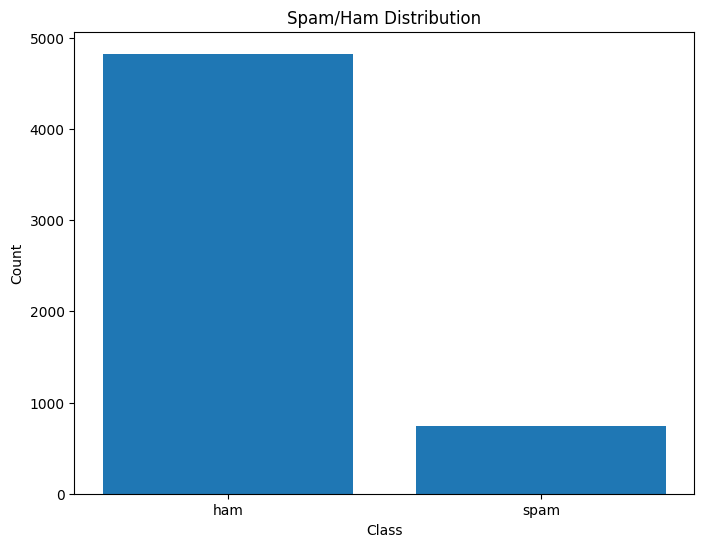

In [6]:
import matplotlib.pyplot as plt

class_counts = data['v1'].value_counts()

plt.figure(figsize=(8, 6))
plt.bar(class_counts.index, class_counts.values)
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Spam/Ham Distribution')
plt.show()


highly unbalanced data

In [7]:
num_spam = len(data[data['v1'] == 'spam'])

ham_samples = data[data['v1'] == 'ham'].sample(n=num_spam, random_state=42)

balanced_data = pd.concat([data[data['v1'] == 'spam'], ham_samples])

In [8]:
data = balanced_data.sample(frac=1, random_state=42)

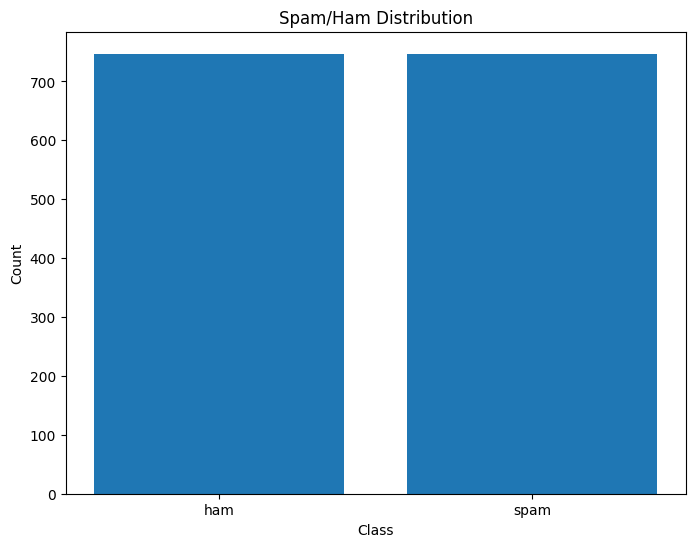

In [9]:
import matplotlib.pyplot as plt

class_counts = data['v1'].value_counts()

plt.figure(figsize=(8, 6))
plt.bar(class_counts.index, class_counts.values)
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Spam/Ham Distribution')
plt.show()

In [10]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
import re

def preprocess_text(text):

    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)
    tokens = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if not word in stop_words]
    stemmer = PorterStemmer()
    tokens = [stemmer.stem(word) for word in tokens]
    preprocessed_text = " ".join(tokens)

    return preprocessed_text


data['v2'] = data['v2'].apply(preprocess_text)
print(data.head())


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


       v1                          v2
270   ham  come mu sort narcot situat
4923  ham   go 4 e normal pilat intro
4598  ham       laid airtel line rest
5093  ham             gokila talk aha
2775  ham        confirm eat esplanad


In [11]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

from sklearn.metrics import precision_score, recall_score, f1_score

In [12]:
X = data['v2']
y = data['v1']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
max_words = 10000
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_train)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

In [14]:
max_length = 100
X_train_pad = pad_sequences(X_train_seq, maxlen=max_length)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_length)

In [15]:
y_train = (y_train == 'spam').astype(int)
y_test = (y_test == 'spam').astype(int)

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, Flatten, Dense
from sklearn.metrics import accuracy_score

In [36]:
model1 = Sequential()
model1.add(Embedding(max_words, 128, input_length=max_length))
model1.add(Conv1D(filters=32, kernel_size=3, activation='relu'))
model1.add(MaxPooling1D(pool_size=2))
model1.add(Flatten())
model1.add(Dense(1, activation='sigmoid'))
model1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model1.summary()
model1.fit(X_train_pad, y_train, epochs=10, batch_size=32, validation_split=0.2)
y_pred_model1 = (model1.predict(X_test_pad) > 0.5).astype(int)
precision_model1 = precision_score(y_test, y_pred_model1)
recall_model1 = recall_score(y_test, y_pred_model1)
f1_model1 = f1_score(y_test, y_pred_model1)
accuracy_model1 = accuracy_score(y_test, y_pred_model1)
print("Model 1 - Accuracy:", accuracy_model1)
print("Model 1 - Precision:", precision_model1)
print("Model 1 - Recall:", recall_model1)
print("Model 1 - F1-Score:", f1_model1)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_13 (Embedding)             │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_16 (Conv1D)                   │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_13 (MaxPooling1D)      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_13 (Flatten)                 │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - accuracy: 0.5756 - loss: 0.6695 - val_accuracy: 0.7197 - val_loss: 0.5660
Epoch 2/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8288 - loss: 0.4623 - val_accuracy: 0.8912 - val_loss: 0.3014
Epoch 3/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9037 - loss: 0.2113 - val_accuracy: 0.9331 - val_loss: 0.1972
Epoch 4/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9635 - loss: 0.1023 - val_accuracy: 0.9372 - val_loss: 0.1646
Epoch 5/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9860 - loss: 0.0516 - val_accuracy: 0.9456 - val_loss: 0.1463
Epoch 6/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9954 - loss: 0.0253 - val_accuracy: 0.9456 - val_loss: 0.1462
Epoch 7/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9951 - loss: 0.0151 - val_accuracy: 0.9498 - val_loss: 0.1444
Epoch 8/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9997 - loss: 0.0100 - val_accuracy: 0.9582 - val_loss

In [37]:
model2 = Sequential()
model2.add(Embedding(max_words, 256, input_length=max_length))
model2.add(Conv1D(filters=64, kernel_size=5, activation='relu'))
model2.add(Conv1D(filters=32, kernel_size=3, activation='relu'))
model2.add(MaxPooling1D(pool_size=2))
model2.add(Flatten())
model2.add(Dense(1, activation='sigmoid'))
model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model2.summary()
model2.fit(X_train_pad, y_train, epochs=10, batch_size=32, validation_split=0.2)
y_pred_model2 = (model2.predict(X_test_pad) > 0.5).astype(int)
precision_model2 = precision_score(y_test, y_pred_model2)
recall_model2 = recall_score(y_test, y_pred_model2)
f1_model2 = f1_score(y_test, y_pred_model2)
accuracy_model2 = accuracy_score(y_test, y_pred_model2)
print("Model 2 - Accuracy:", accuracy_model2)
print("Model 2 - Precision:", precision_model2)
print("Model 2 - Recall:", recall_model2)
print("Model 2 - F1-Score:", f1_model2)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_14 (Embedding)             │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_17 (Conv1D)                   │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_18 (Conv1D)                   │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_14 (MaxPooling1D)      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_14 (Flatten)                 │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 6s 107ms/step - accuracy: 0.7189 - loss: 0.6342 - val_accuracy: 0.8452 - val_loss: 0.3731
Epoch 2/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8779 - loss: 0.2904 - val_accuracy: 0.9456 - val_loss: 0.1532
Epoch 3/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9751 - loss: 0.0800 - val_accuracy: 0.9498 - val_loss: 0.1442
Epoch 4/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9986 - loss: 0.0099 - val_accuracy: 0.9498 - val_loss: 0.1638
Epoch 5/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9974 - loss: 0.0170 - val_accuracy: 0.9498 - val_loss: 0.1584
Epoch 6/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9988 - loss: 0.0061 - val_accuracy: 0.9623 - val_loss: 0.1673
Epoch 7/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9993 - loss: 0.0031 - val_accuracy: 0.9498 - val_loss: 0.1826
Epoch 8/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9969 - loss: 0.0046 - val_accuracy: 0.9289 - val_los

In [38]:
model3 = Sequential()
model3.add(Embedding(max_words, 64, input_length=max_length))
model3.add(Conv1D(filters=16, kernel_size=7, activation='relu', strides=2))
model3.add(MaxPooling1D(pool_size=2))
model3.add(Flatten())
model3.add(Dense(1, activation='sigmoid'))
model3.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model3.summary()
model3.fit(X_train_pad, y_train, epochs=10, batch_size=32, validation_split=0.2)
y_pred_model3 = (model3.predict(X_test_pad) > 0.5).astype(int)
precision_model3 = precision_score(y_test, y_pred_model3)
recall_model3 = recall_score(y_test, y_pred_model3)
f1_model3 = f1_score(y_test, y_pred_model3)
accuracy_model3 = accuracy_score(y_test, y_pred_model3)
print("Model 3 - Accuracy:", accuracy_model3)
print("Model 3 - Precision:", precision_model3)
print("Model 3 - Recall:", recall_model3)
print("Model 3 - F1-Score:", f1_model3)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_15 (Embedding)             │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_19 (Conv1D)                   │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_15 (MaxPooling1D)      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_15 (Flatten)                 │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - accuracy: 0.7786 - loss: 0.6694 - val_accuracy: 0.8285 - val_loss: 0.5556
Epoch 2/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8318 - loss: 0.4858 - val_accuracy: 0.8494 - val_loss: 0.3527
Epoch 3/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8448 - loss: 0.3531 - val_accuracy: 0.8703 - val_loss: 0.2825
Epoch 4/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9189 - loss: 0.2306 - val_accuracy: 0.9331 - val_loss: 0.2133
Epoch 5/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9597 - loss: 0.1410 - val_accuracy: 0.9372 - val_loss: 0.1841
Epoch 6/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9718 - loss: 0.0938 - val_accuracy: 0.9498 - val_loss: 0.1735
Epoch 7/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9829 - loss: 0.0579 - val_accuracy: 0.9372 - val_loss: 0.1742
Epoch 8/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9914 - loss: 0.0382 - val_accuracy: 0.9331 - val_loss

In [39]:
data = {'Model': ['Model 1', 'Model 2', 'Model 3'],
        'Precision': [precision_model1, precision_model2, precision_model3],
        'Recall': [recall_model1, recall_model2, recall_model3],
        'F1-Score': [f1_model1, f1_model2, f1_model3],
        'Accuracy': [accuracy_model1, accuracy_model2, accuracy_model3]}
df = pd.DataFrame(data)
print(df)


     Model  Precision    Recall  F1-Score  Accuracy
0  Model 1   0.986486  0.941935  0.963696  0.963211
1  Model 2   0.993151  0.935484  0.963455  0.963211
2  Model 3   0.961290  0.961290  0.961290  0.959866


Model 2 has the best precision, while Model 1 has the best recall and F1-score. Model 2 and Model 1 have the same accuracy.

Model 2 has a larger embedding size and more filters, which allows it to capture more nuanced relationships between words and extract more features.

Model 1 has only one convolutional layer and fewer filters, which might limit its ability to learn complex patterns.

Model 3 has the smallest embedding size and uses a stride of 2 in the convolutional layer, which might lead to the loss of some important information.

The differences in the scores are relatively small, and the best model might depend on the specific requirements of the task. If precision is more important, Model 2 would be the best choice. If recall is more important, Model 1 would be a better option.